In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 不显示坐标轴
    plt.title(title) # 图像题目
    plt.show()

从统计的角度讲，直方图是图像内灰度值的统计特性与图像灰度值之间的函数，直方图统计图像内各个灰度级出现的次数。

有时为了便于表示，也会采用归一化直方图。在归一化直方图中，x轴仍然表示灰度级；y轴不再表示灰度级出现的次数，而是灰度级出现的频率。

# ravel函数

numpy中的ravel()、flatten()、squeeze()都有将多维数组转换为一维数组的功能。

区别：
* ravel()：如果没有必要，不会产生源数据的副本 

* flatten()：返回源数据的副本 

* squeeze()：只能对维数为1的维度降维

# plt 绘图

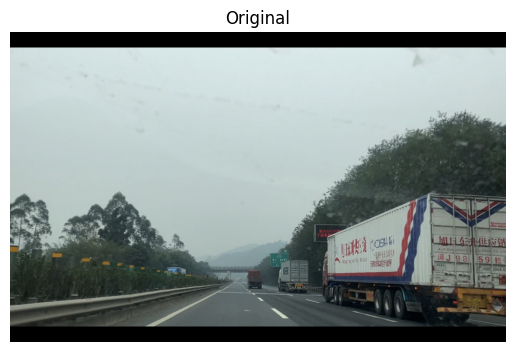

(array([1670235.,  266425.,  814087., 1256867., 1087679.,  705437.,
         617280.,  373488.,  339272.,  337621.,  235397.,  465220.,
        1243544., 2541904., 2603620.,  993924.]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
        165., 180., 195., 210., 225., 240.]),
 <BarContainer object of 16 artists>)

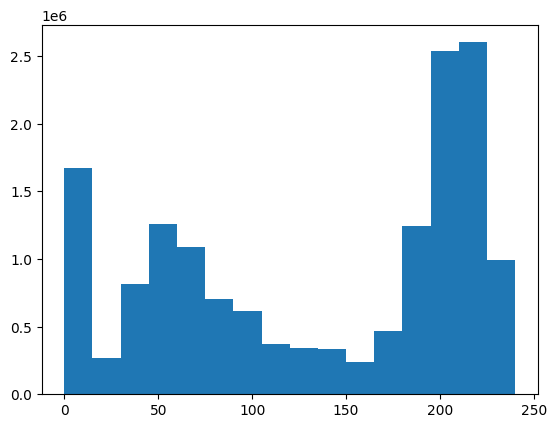

In [3]:
img = cv2.imread('images/highway.jpg')
show(img, 'Original')
# plt.hist(img.ravel(), 256)
plt.hist(img.ravel(), 16)

# 使用OpenCV绘制直方图

## 用cv2.calcHist()函数统计图像直方图信息

In [4]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist

array([[5.11958e+05],
       [6.03000e+02],
       [5.64200e+03],
       [7.86000e+02],
       [2.36000e+02],
       [1.10200e+03],
       [3.69000e+02],
       [1.62700e+03],
       [1.33500e+03],
       [1.15900e+03],
       [1.42900e+03],
       [2.39100e+03],
       [3.14700e+03],
       [3.22800e+03],
       [3.62400e+03],
       [3.48400e+03],
       [4.39100e+03],
       [5.59700e+03],
       [5.51800e+03],
       [5.92600e+03],
       [6.08400e+03],
       [5.77100e+03],
       [5.85900e+03],
       [5.69200e+03],
       [6.33300e+03],
       [7.07000e+03],
       [8.24700e+03],
       [9.25800e+03],
       [9.75800e+03],
       [1.05850e+04],
       [1.13090e+04],
       [1.21200e+04],
       [1.27910e+04],
       [1.39360e+04],
       [1.52200e+04],
       [1.61590e+04],
       [1.64610e+04],
       [1.84100e+04],
       [1.94390e+04],
       [2.07760e+04],
       [2.20650e+04],
       [2.27470e+04],
       [2.38470e+04],
       [2.44870e+04],
       [2.44220e+04],
       [2.

使用matplotlib.pyplot模块内的plot()函数，可以将函数cv2.calcHist()的返回值绘制为图像直方图。

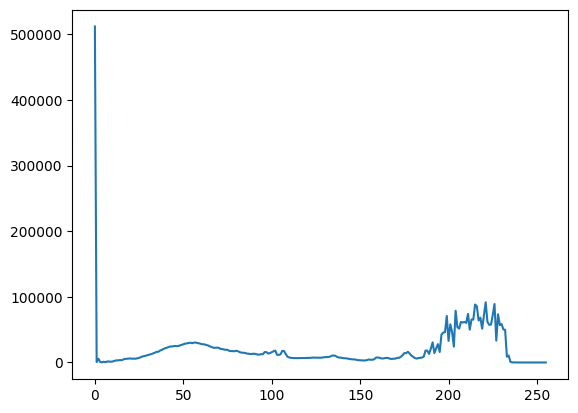

In [5]:
plt.plot(hist)

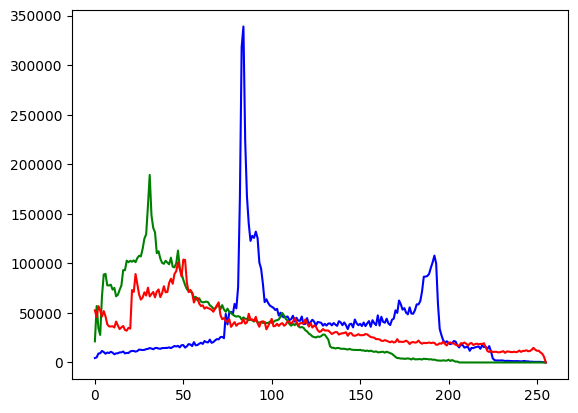

In [6]:
o=cv2.imread("images/color.jpg")
histb = cv2.calcHist([o], [0], None, [256], [0,255])
histg = cv2.calcHist([o], [1], None, [256], [0,255])
histr = cv2.calcHist([o], [2], None, [256], [0,255])
plt.plot(histb, color='b')
plt.plot(histg, color='g')
plt.plot(histr, color='r')
plt.show()

## 使用掩模绘制直方图

当使用掩模图像获取直方图时，仅获取掩模参数mask指定区域的直方图。

# 直方图均衡化

如果一幅图像拥有全部可能的灰度级，并且像素值的灰度均匀分布，那么这幅图像就具有高对比度和多变的灰度色调，灰度级丰富且覆盖范围较大。

OpenCV使用函数cv2.equalizeHist()实现直方图均衡化。

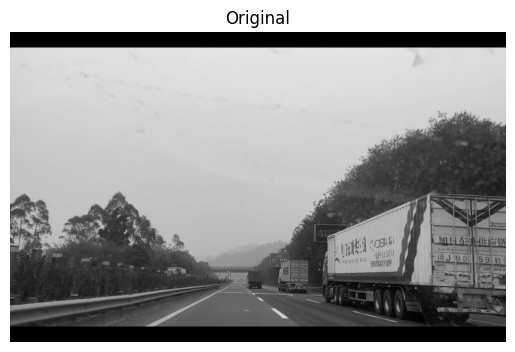

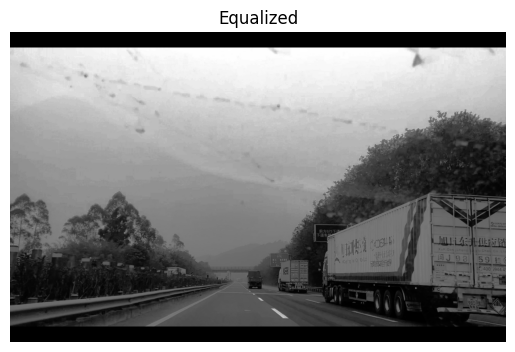

(array([525593.,  17130.,  15248.,  22825.,  17229.,  18382.,  18718.,
         19067.,  11387.,  23822.,  14255.,  16511.,  18005.,  19435.,
         19719.,  20664.,      0.,  21811.,  22401.,  23565.,  23627.,
             0.,  24266.,  24975.,  25765.,      0.,  25884.,  26204.,
             0.,  26912.,  27851.,      0.,  28209.,      0.,  30921.,
         32290.,      0.,  32269.,      0.,  30756.,  31256.,      0.,
         31996.,      0.,  31917.,      0.,  31063.,  30758.,      0.,
         29840.,      0.,  29887.,  29603.,      0.,  27890.,  25730.,
         24676.,      0.,  23210.,  23437.,  23206.,  21073.,      0.,
         20443.,  20245.,  19739.,  19906.,  19620.,  19423.,  18350.,
         18401.,  17502.,  16383.,  16353.,  29750.,  14239.,  13581.,
         24048.,  22974.,  13314.,  12897.,  15594.,  16952.,  16733.,
         35808.,  13489.,  15020.,  15379.,  21795.,  20092.,  22006.,
         16380.,  20994.,  18695.,  12913.,  19039.,  18909.,  18212.,
      

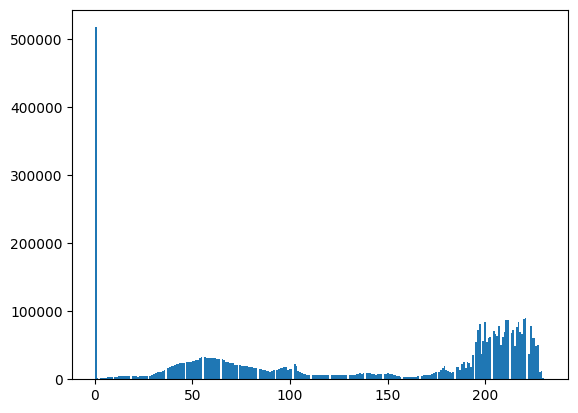

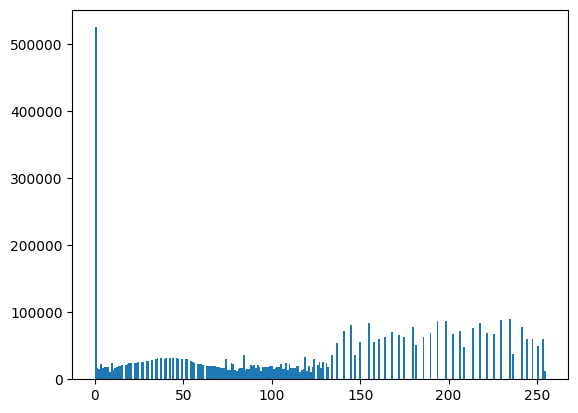

In [7]:
#-----------读取原始图像---------------
img = cv2.imread('images/highway.jpg', cv2.IMREAD_GRAYSCALE)
#-----------直方图均衡化处理---------------
equ = cv2.equalizeHist(img)
#-----------显示均衡化前后的图像---------------
show(img, 'Original')
show(equ, 'Equalized')
#-----------显示均衡化前后的直方图---------------
plt.figure("原始图像直方图")   #构建窗口
plt.hist(img.ravel(),256)
plt.figure("均衡化结果直方图")  #构建新窗口
plt.hist(equ.ravel(),256)

# pyplot模块介绍

matplotlib.pyplot模块[插图]提供了一个类似于MATLAB绘图方式的框架，可以使用其中的函数方便地绘制图形。

## subplot函数

模块matplotlib.pyplot提供了函数matplotlib.pyplot.subplot()用来向当前窗口内添加一个子窗口对象。

(<AxesSubplot: >,
 (array([264643., 273668., 303508., 271521., 295921., 238476., 343666.,
         291571., 230765., 281411., 262338., 380357., 231257., 323341.,
         281763., 268910., 292534., 339869., 294215., 275059., 272923.,
         273192., 328032., 272872., 275834., 293438., 309913., 305827.,
         272446., 286616., 306439., 273675.]),
  array([  0.     ,   7.96875,  15.9375 ,  23.90625,  31.875  ,  39.84375,
          47.8125 ,  55.78125,  63.75   ,  71.71875,  79.6875 ,  87.65625,
          95.625  , 103.59375, 111.5625 , 119.53125, 127.5    , 135.46875,
         143.4375 , 151.40625, 159.375  , 167.34375, 175.3125 , 183.28125,
         191.25   , 199.21875, 207.1875 , 215.15625, 223.125  , 231.09375,
         239.0625 , 247.03125, 255.     ]),
  <BarContainer object of 32 artists>))

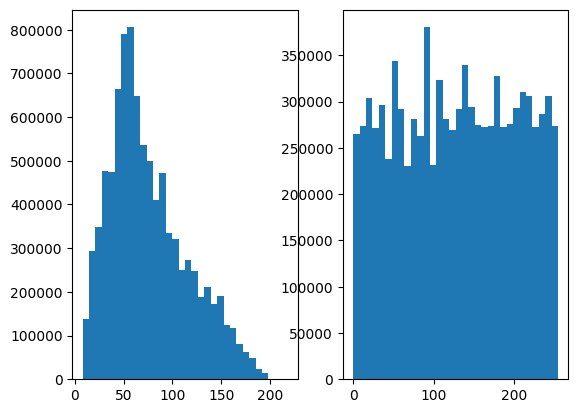

In [9]:
img = cv2.imread('images/color.jpg', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
plt.figure("subplot示例")
plt.subplot(121), plt.hist(img.ravel(),32)
plt.subplot(122), plt.hist(equ.ravel(),32)

## imshow函数

模块matplotlib.pyplot提供了函数matplotlib.pyplot.imshow()用来显示图像。

注意： 函数matplotlib.pyplot.imshow()的显示顺序是RGB模式的。其他格式需要先转换。

(-0.5, 3839.5, 2399.5, -0.5)

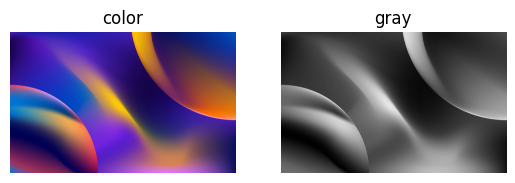

In [16]:
img1 = cv2.imread('images/color.jpg', 1)
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.figure('结果')
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('color')
plt.axis('off')
plt.subplot(122), plt.imshow(img2, cmap=plt.cm.gray)
plt.title('gray')
plt.axis('off')
# plt.show()
